# Red Neuronal Recurrente LSTM 

### Este modelo de IA realizará el análisis técnico sobre la criptmoneda Bitcoin (BTC)

#### Importación de bibliotecas

In [2]:
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#### Dataset

In [3]:
bp = pd.read_csv("./BitcoinHistoricalData.csv",index_col='Date',parse_dates=['Date'],).iloc[::-1]

Verificamos que los tipos de datos sean los correctos

In [4]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4598 entries, 2011-09-09 to 2024-04-10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   4598 non-null   float64
 1   Open    4598 non-null   float64
 2   High    4598 non-null   float64
 3   Low     4598 non-null   float64
 4   Volume  4598 non-null   float64
 5   Change  4598 non-null   float64
dtypes: float64(6)
memory usage: 251.5 KB


Obtenemos la información general del dataset

In [5]:
bp.head()

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2011-09-09,5.0,6.5,6.6,4.2,217430.0,-0.2297
2011-09-10,4.8,5.0,5.5,4.6,44490.0,-0.0517
2011-09-11,5.9,4.8,7.4,4.6,143790.0,0.2285
2011-09-12,6.1,5.9,6.6,5.4,63860.0,0.0375
2011-09-13,5.8,6.1,6.1,5.7,23760.0,-0.0461


Checamos si no hay valores nulos

In [6]:
bp.isnull().sum()

Price     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [7]:
train_set = bp[:'2019'].iloc[:,2:3]
train_set

,High
Date,
2011-09-09,6.6
2011-09-10,5.5
2011-09-11,7.4
2011-09-12,6.6
2011-09-13,6.1
...,...
2019-12-27,7293.8
2019-12-28,7375.9
2019-12-29,7518.9


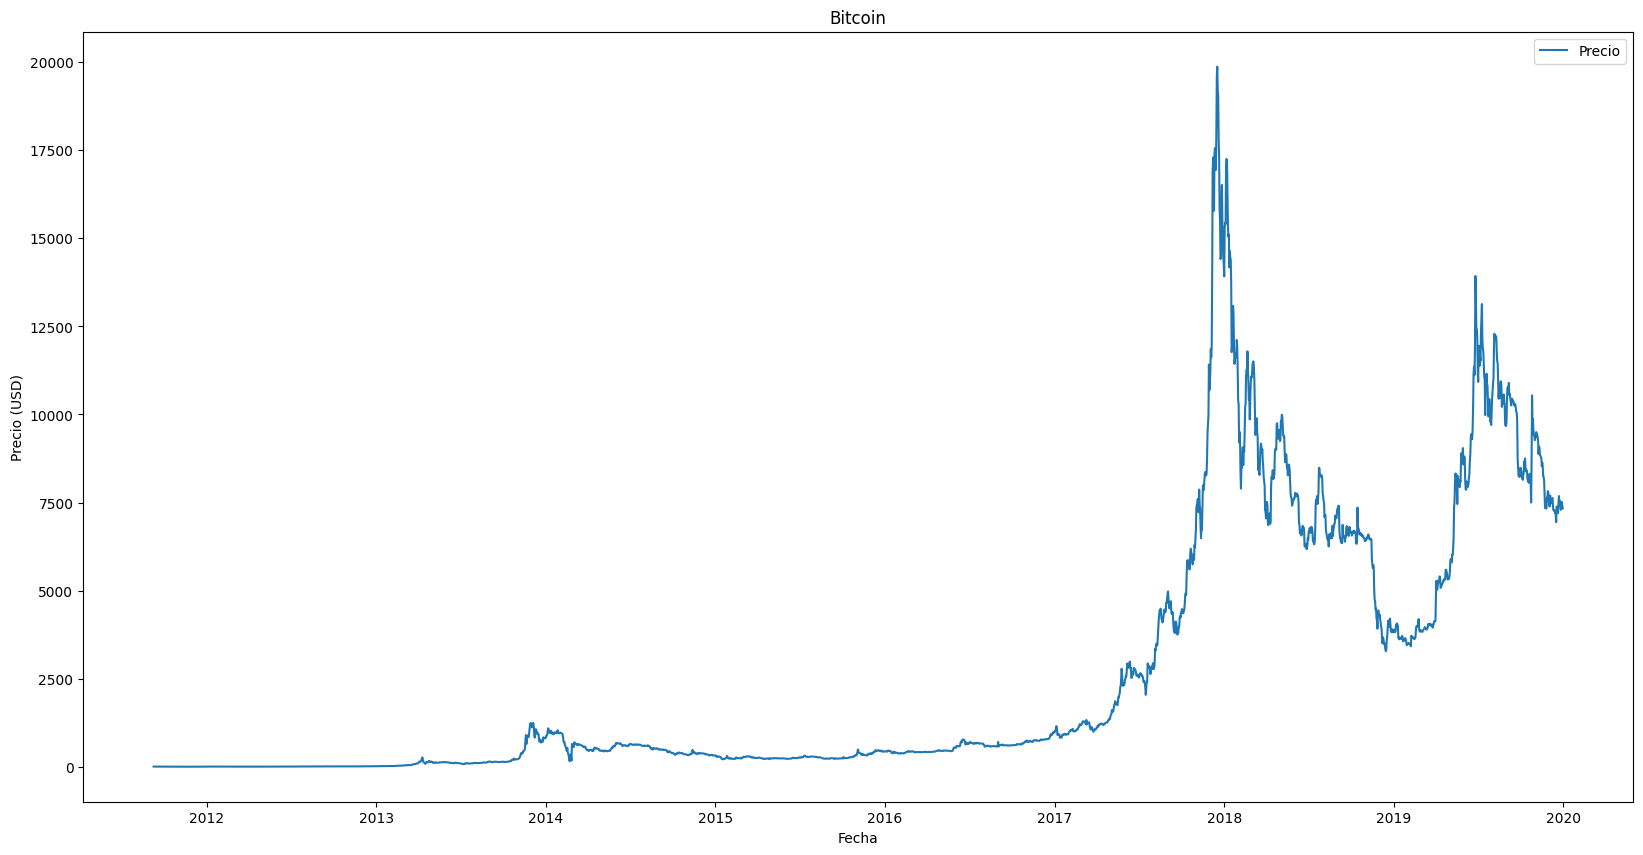

In [8]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='High', data=train_set, label='Precio')
plt.title('Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [9]:
validation_set = bp['2022':'2024'].iloc[:,2:3]
validation_set

,High
Date,
2022-01-01,47917.6
2022-01-02,47944.9
2022-01-03,47556.0
2022-01-04,47505.4
2022-01-05,47019.4
...,...
2024-04-06,69632.0
2024-04-07,70285.8
2024-04-08,72710.8


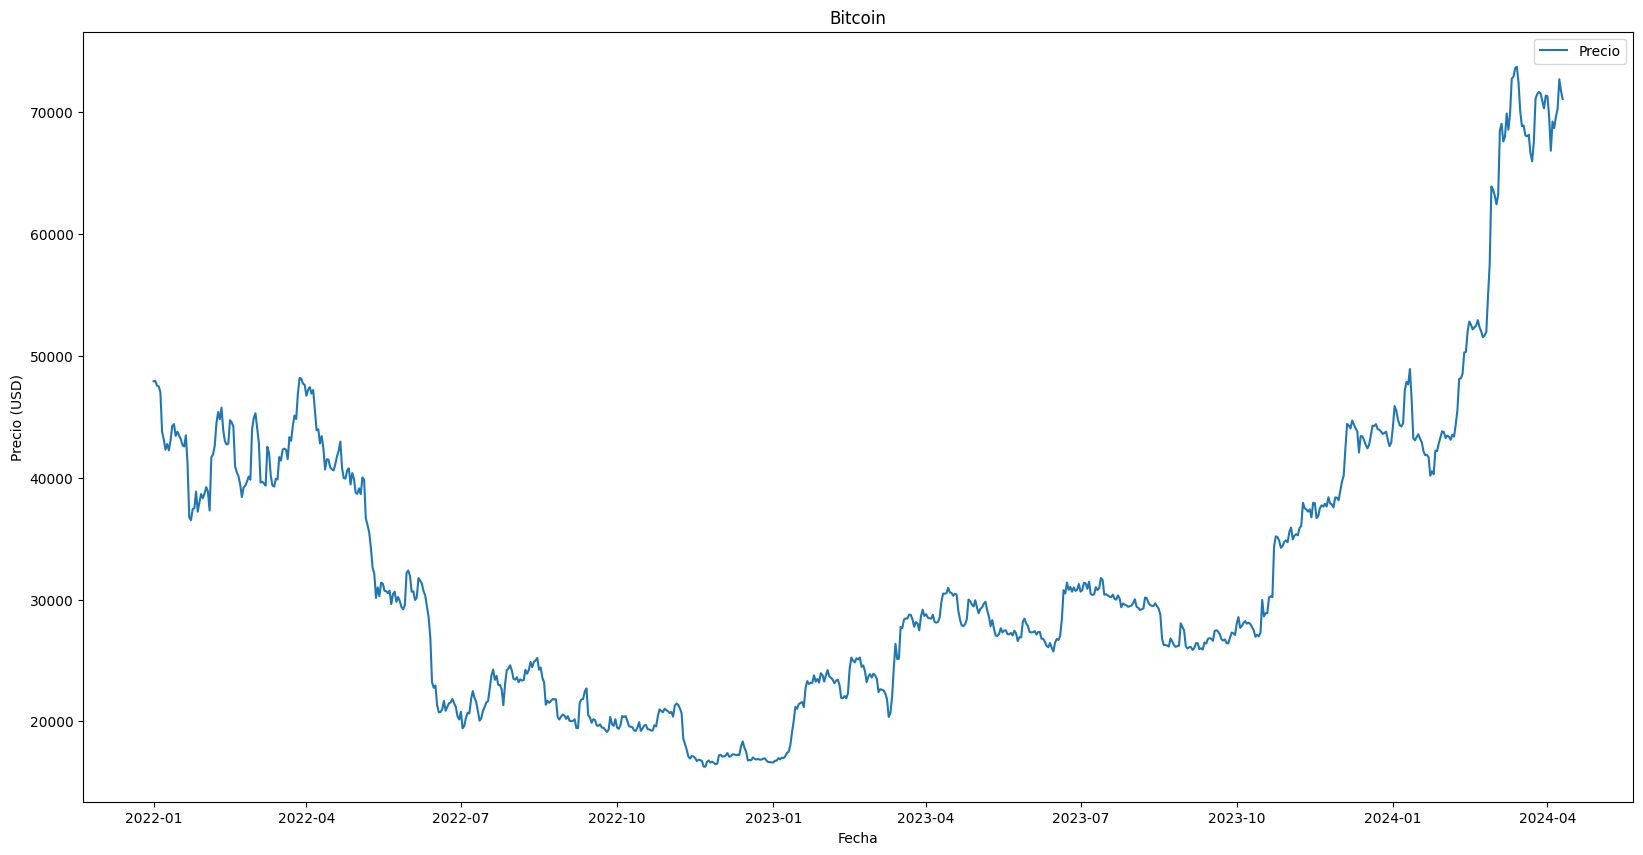

In [10]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='High', data=validation_set, label='Precio')
plt.title('Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

### Normalización de los datos

In [11]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)    

### Ajuste de los sets de entrenamineto y validación

In [12]:
time_step = 60
X_train = []
Y_train = []
m = len(train_set_scaled)

for i in range(time_step,m):
    X_train.append(train_set_scaled[i-time_step:i,0])
    Y_train.append(train_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Creación y entrenamiento de la Red LSTM

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [15]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 100

In [16]:
modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=30,batch_size=64)

Epoch 1/30


C:\Users\jrmal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0063
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.6849e-04
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 7.4629e-04
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.7352e-04
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.3569e-04
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 4.7047e-04
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 4.8716e-04
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.9982e-04
Epoch 9/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.9281e-04
Epoch 10/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3.0613e-04
Epoch 11/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.1682e-04
Epoch 12/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.1969e-04
Epoch 13/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3.2030e-04
Epoch 14/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.8132e-04
Epoch 15/30
47/47 ━━━━━━━━━━━━

### Prediccion

In [17]:
x_test = validation_set
x_test = sc.transform(x_test)

In [18]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [22]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
graph = validation_set[60:]
graph['Prediction']  = prediccion

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\jrmal\AppData\Local\Temp\ipykernel_23040\705195191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['Prediction']  = prediccion


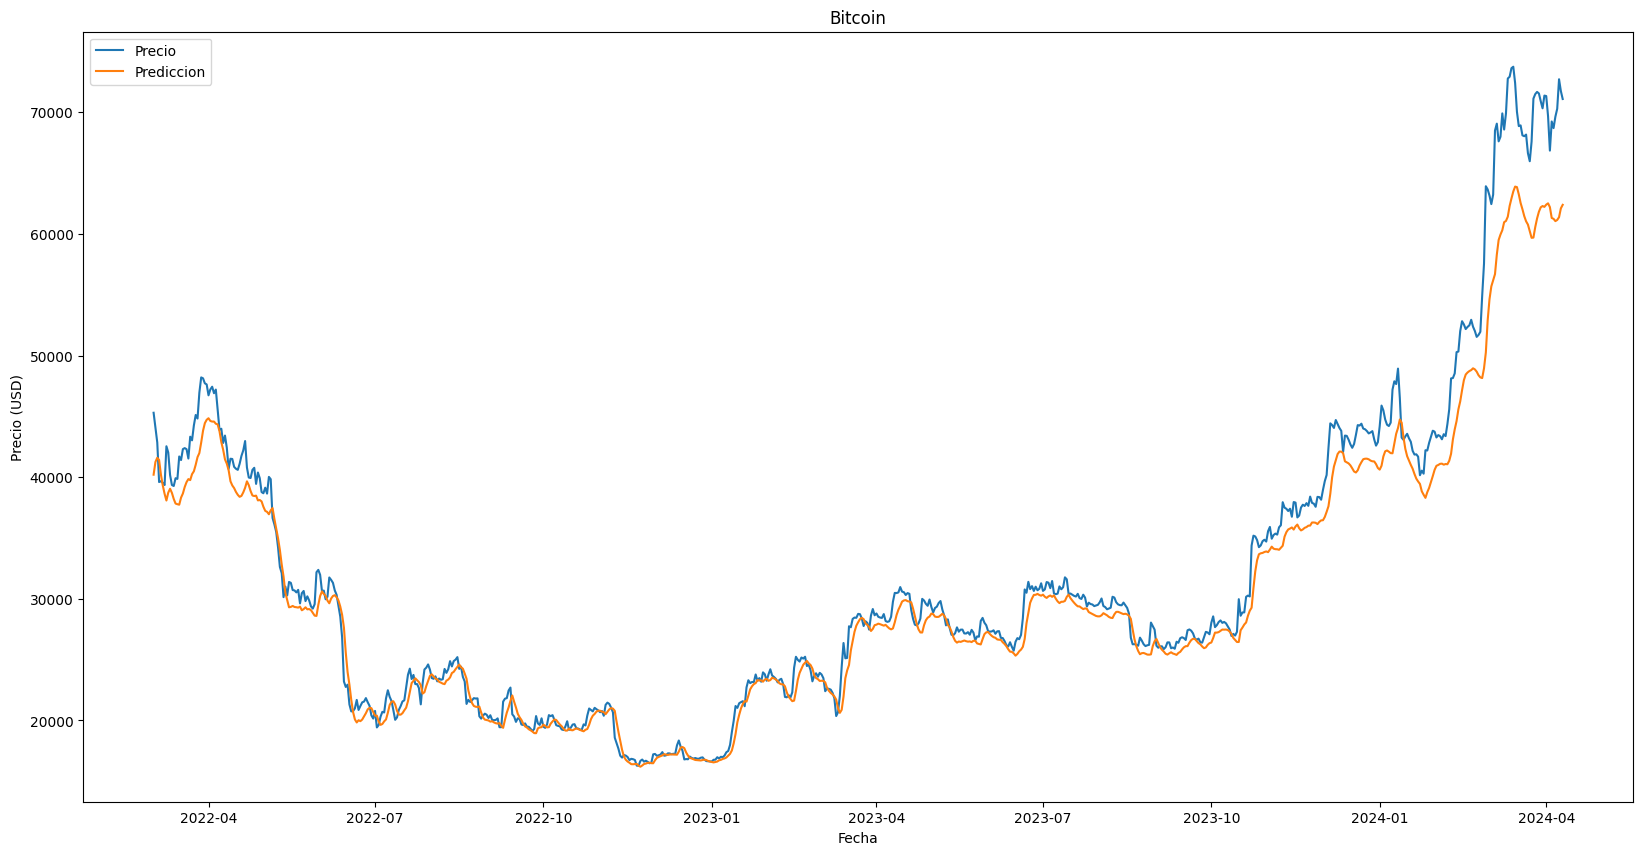

In [20]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='High', data=graph, label='Precio')
sns.lineplot(x='Date', y='Prediction', data=graph, label='Prediccion')
plt.title('Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()